### Relational Plots:
These kind of plots are used to analyze the relationship between features.

- Scatter Plot
- Line Plots

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Loading the datasets to be used in this lab

titanic = sns.load_dataset('titanic')
fmri = sns.load_dataset('fmri')
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Scatter Plot

very good to visualize the relationship between two numeric features.
<br>
sns.scatterplot(data, x, y, hue, style, palette, size, sizes, legend, markers...) and also sns.relplot()

<AxesSubplot: xlabel='age', ylabel='fare'>

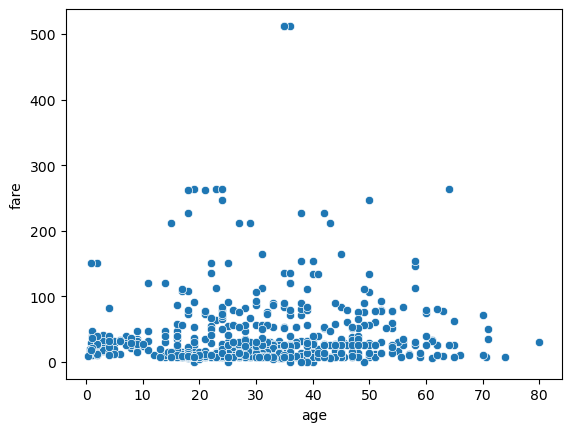

In [8]:
sns.scatterplot(data=titanic, x="age", y="fare")

<AxesSubplot: xlabel='age', ylabel='fare'>

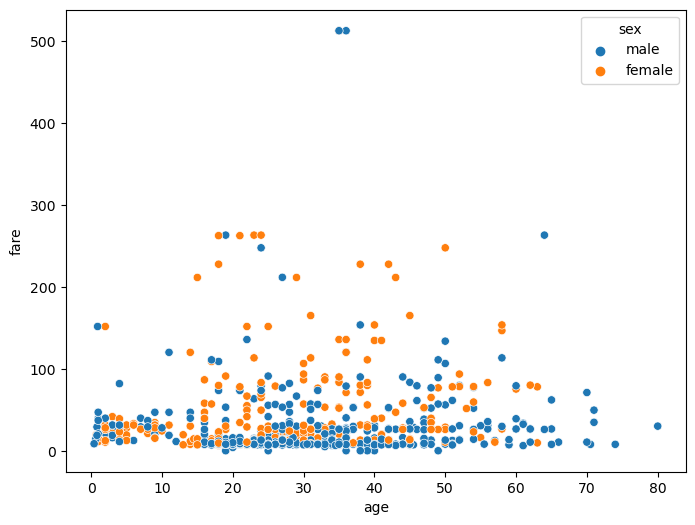

In [10]:
# we can use hue parameter to see another feature
plt.figure(figsize=(8,6))
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex')

Men paid a higher fare than women

<AxesSubplot: xlabel='age', ylabel='fare'>

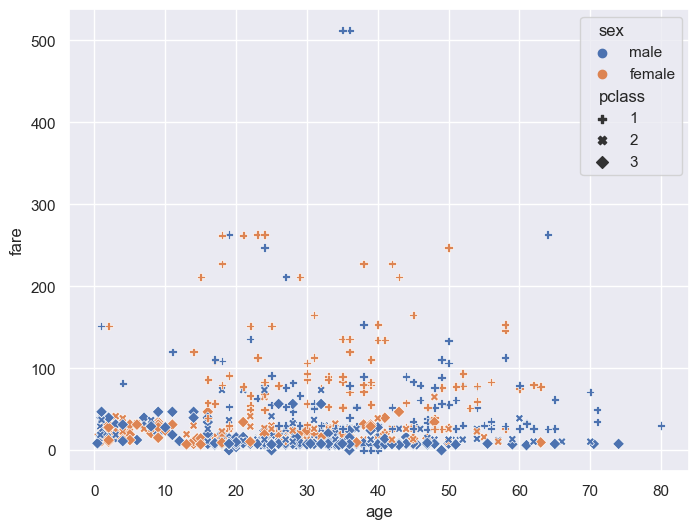

In [20]:
plt.figure(figsize=(8,6))

markers = {1:'P', 2:'X', 3:'D'} # P, X, and D are markers
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex', style='pclass', markers=markers)

## Line plots

Line plots are used to analyze the changes in one variable with respect to other varible such as time.
<br>
To make line plot in Seaborn, we will use sns.relplot(), the kind parameter being line. You can make a scatter plots by changing the kind to scatter.

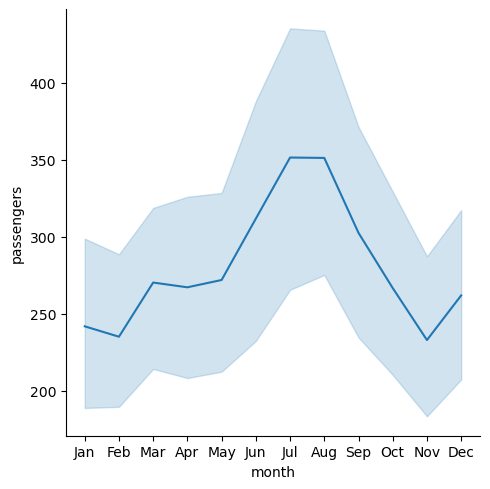

In [14]:
sns.relplot(data=flights, x='month', y='passengers', kind='line')

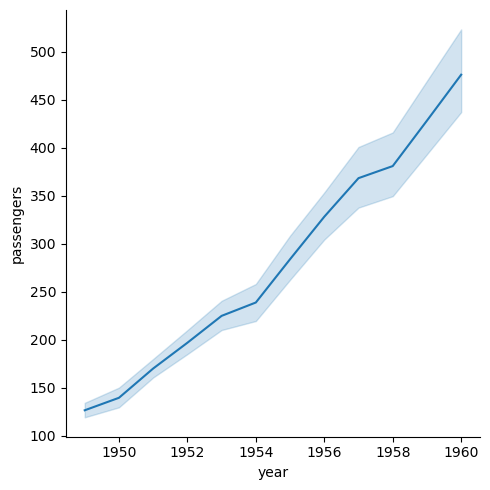

In [19]:
sns.relplot(data=flights, x='year', y='passengers', kind='line')

This light blue background is the confidence interval. We can remove them using "errorbar=None"

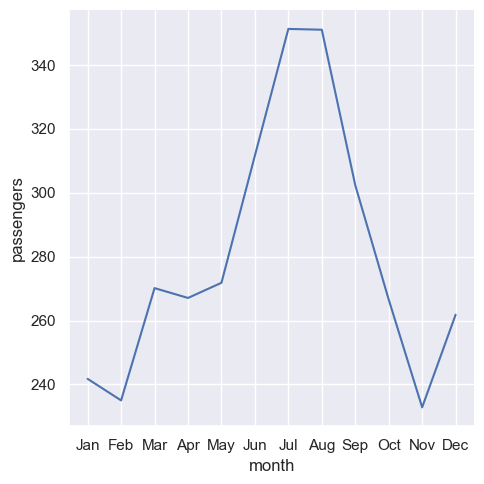

In [19]:
sns.set_theme(style="darkgrid") #setting the grid for all next plots

sns.relplot(data=flights, x='month', y='passengers', errorbar=None, kind='line')

By default, relplot will aggregate the values on y axis in accordance to x axis. You can get rid of it by settng estimator=None.

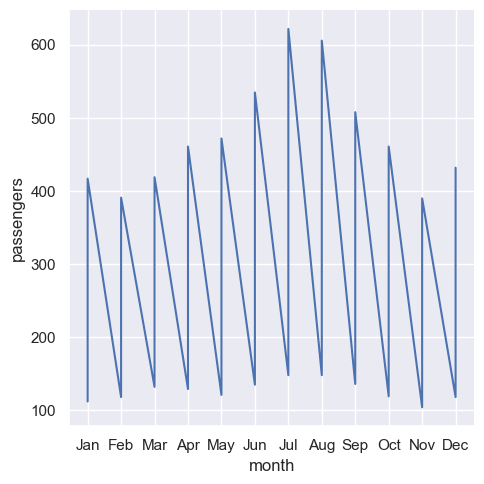

In [26]:
sns.relplot(data=flights, x='month', y='passengers', errorbar=None, estimator=None, kind='line')

In [35]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


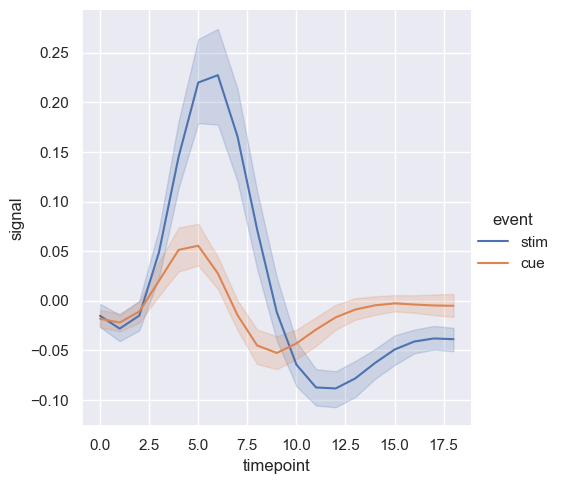

In [38]:
# we can add multiple lines

sns.relplot(data=fmri, x='timepoint', y='signal', hue='event', kind='line', )

Displaying multiple relationship:

Text(0.5, 1.0, 'teste')

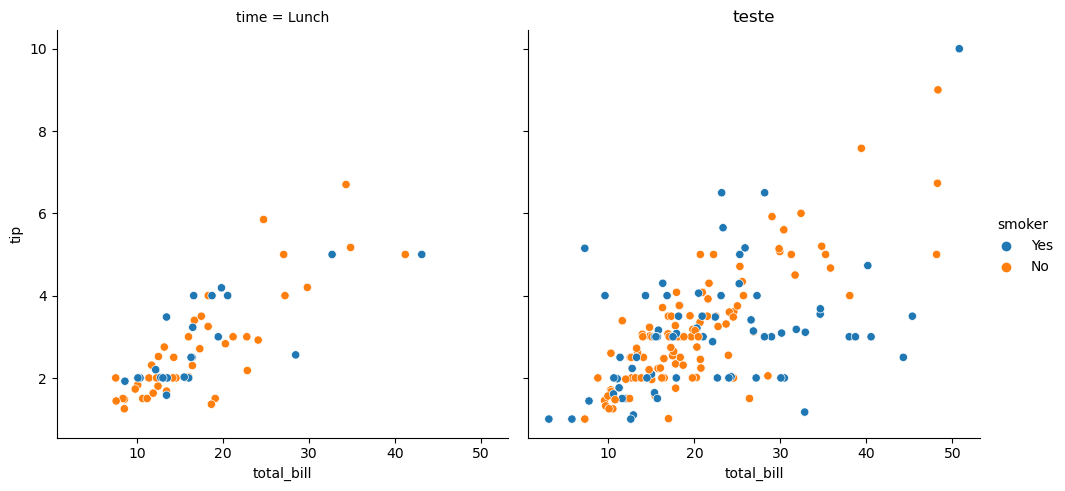

In [7]:
# displaying two graphs by adding the col variable
sns.relplot(data=tips, x='total_bill', y='tip', hue='smoker', col='time')

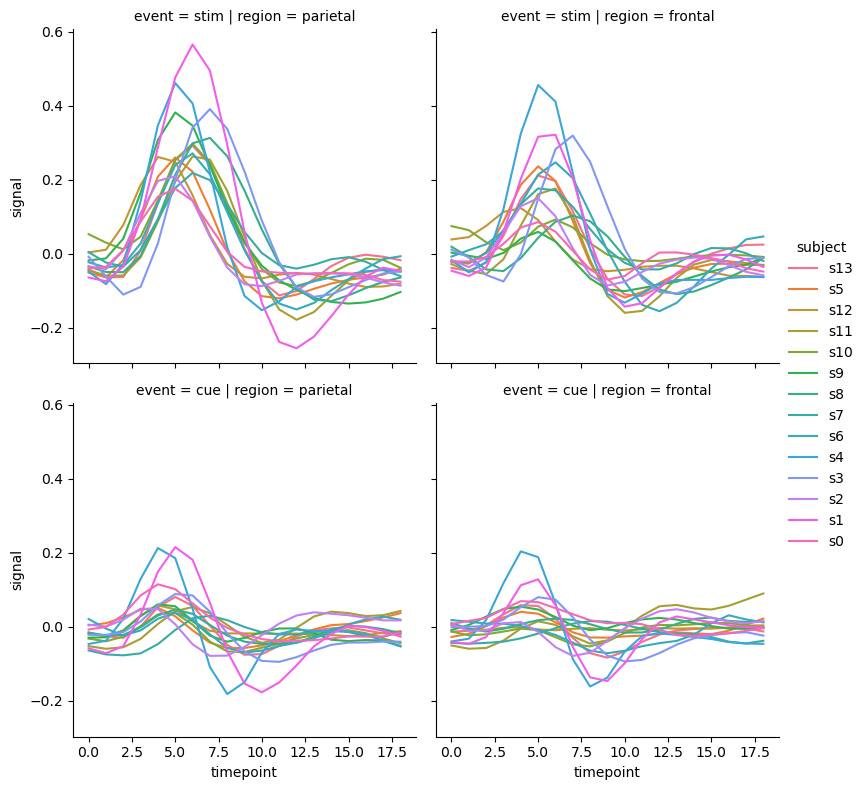

In [8]:
sns.relplot(x='timepoint', y='signal', hue='subject', col='region', row='event', height=4,
           kind='line', estimator=None, data=fmri)

This type of graph is good to understand the varios relationship using different variables, how they variate in each scenario

## Distribution Plots

These kind of plots are used to visualize the distribution of the features. Understanding how your data is distributed can help you to determine the range of values, their central tendency, or if they maybe inclined in one direction and also spotting outliers.

Distribution plots functions:

- displot()
- jointplot()
- pairplot()
- rugplot()
- kdeplot

### Plotting histograms with displot() and histplot()

Histogram is a bar plot whose x-axis is a variable or a feature and y-axis being the count of values of that particular variable. By default, displot() plots the histogram.


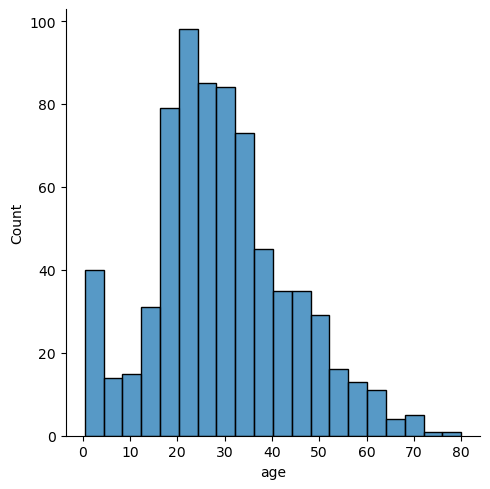

In [10]:
sns.displot(titanic['age'])

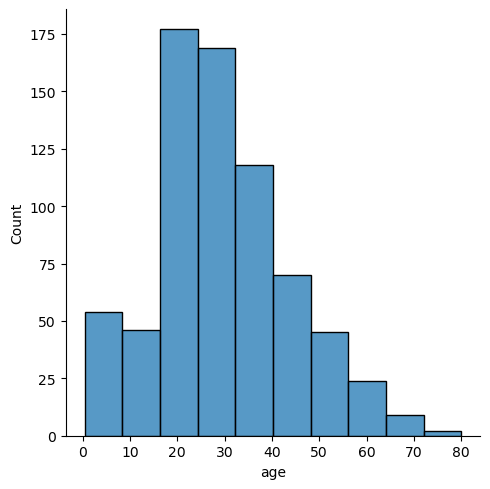

In [11]:
sns.displot(titanic['age'], kde=False, bins=10)

<AxesSubplot: xlabel='day', ylabel='Count'>

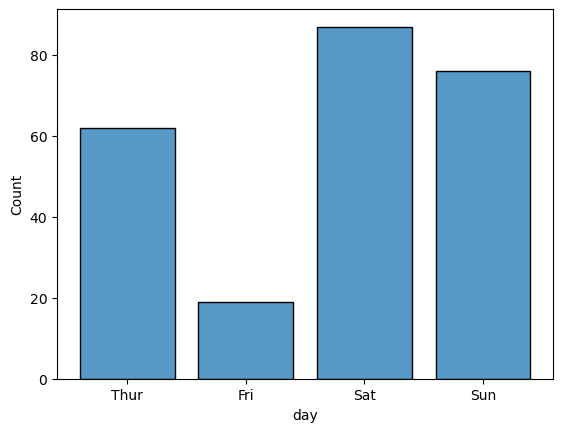

In [12]:
# histplot() can be used to display categorical data as well
sns.histplot(tips, x='day', shrink=.8)

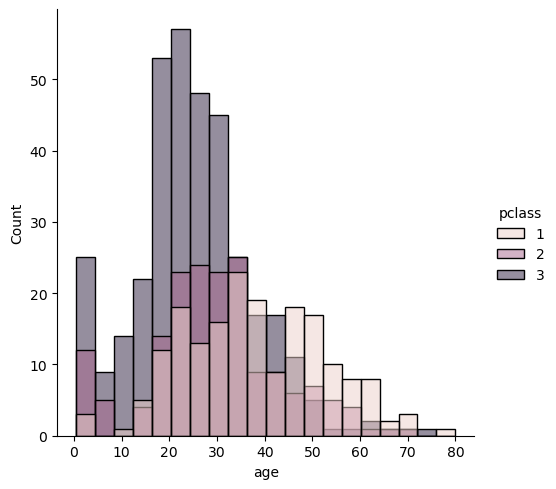

In [13]:
sns.displot(titanic, x='age', hue='pclass')

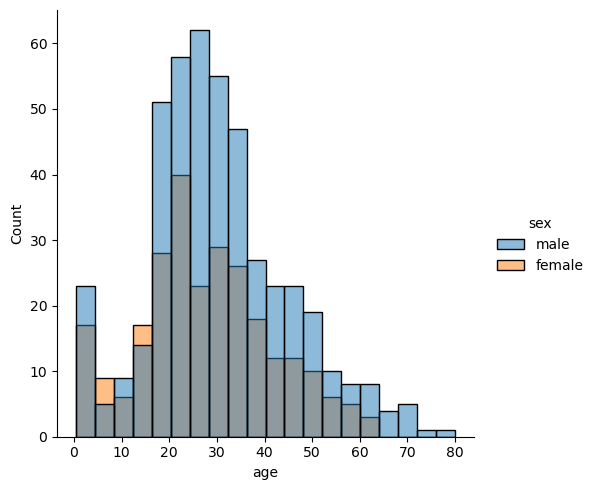

In [14]:
sns.displot(titanic, x='age', hue='sex')

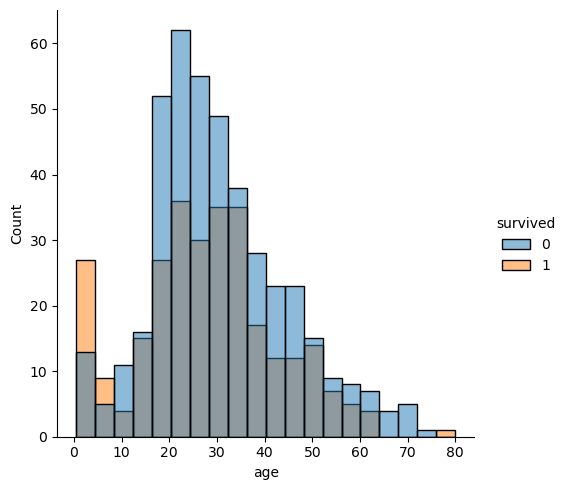

In [15]:
sns.displot(titanic, x='age', hue='survived')

## Plotting Bivariate Data with Jointplot()

We use jointplot() to plot two variables with bivariate and univariate graphs. We can have the following options in kind: scatter, reg, resid, kde, hex. The default kind is scatter.

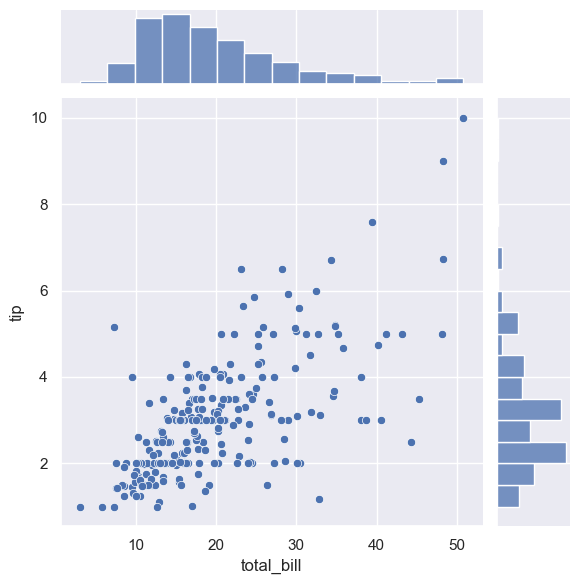

In [21]:
sns.jointplot(data=tips, x='total_bill', y='tip')

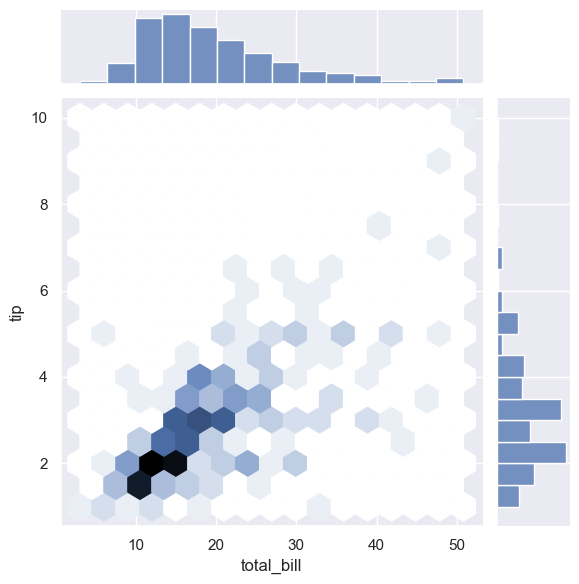

In [22]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex')

These graphs are good to understand the relationship between two variables by displaying their distribution and also a scatter plot

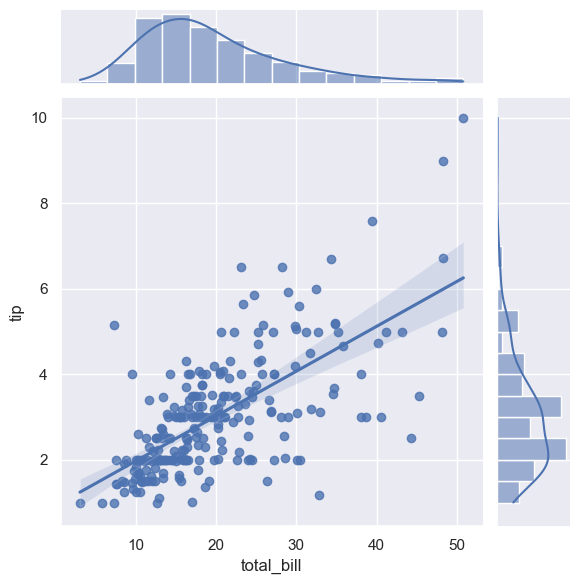

In [23]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg')

## Plotting many distribution with pairplot()

pairplot() visualize all possible distributions of variables in datasets. This is a cool plot, you can immmediately see relationships between features.


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


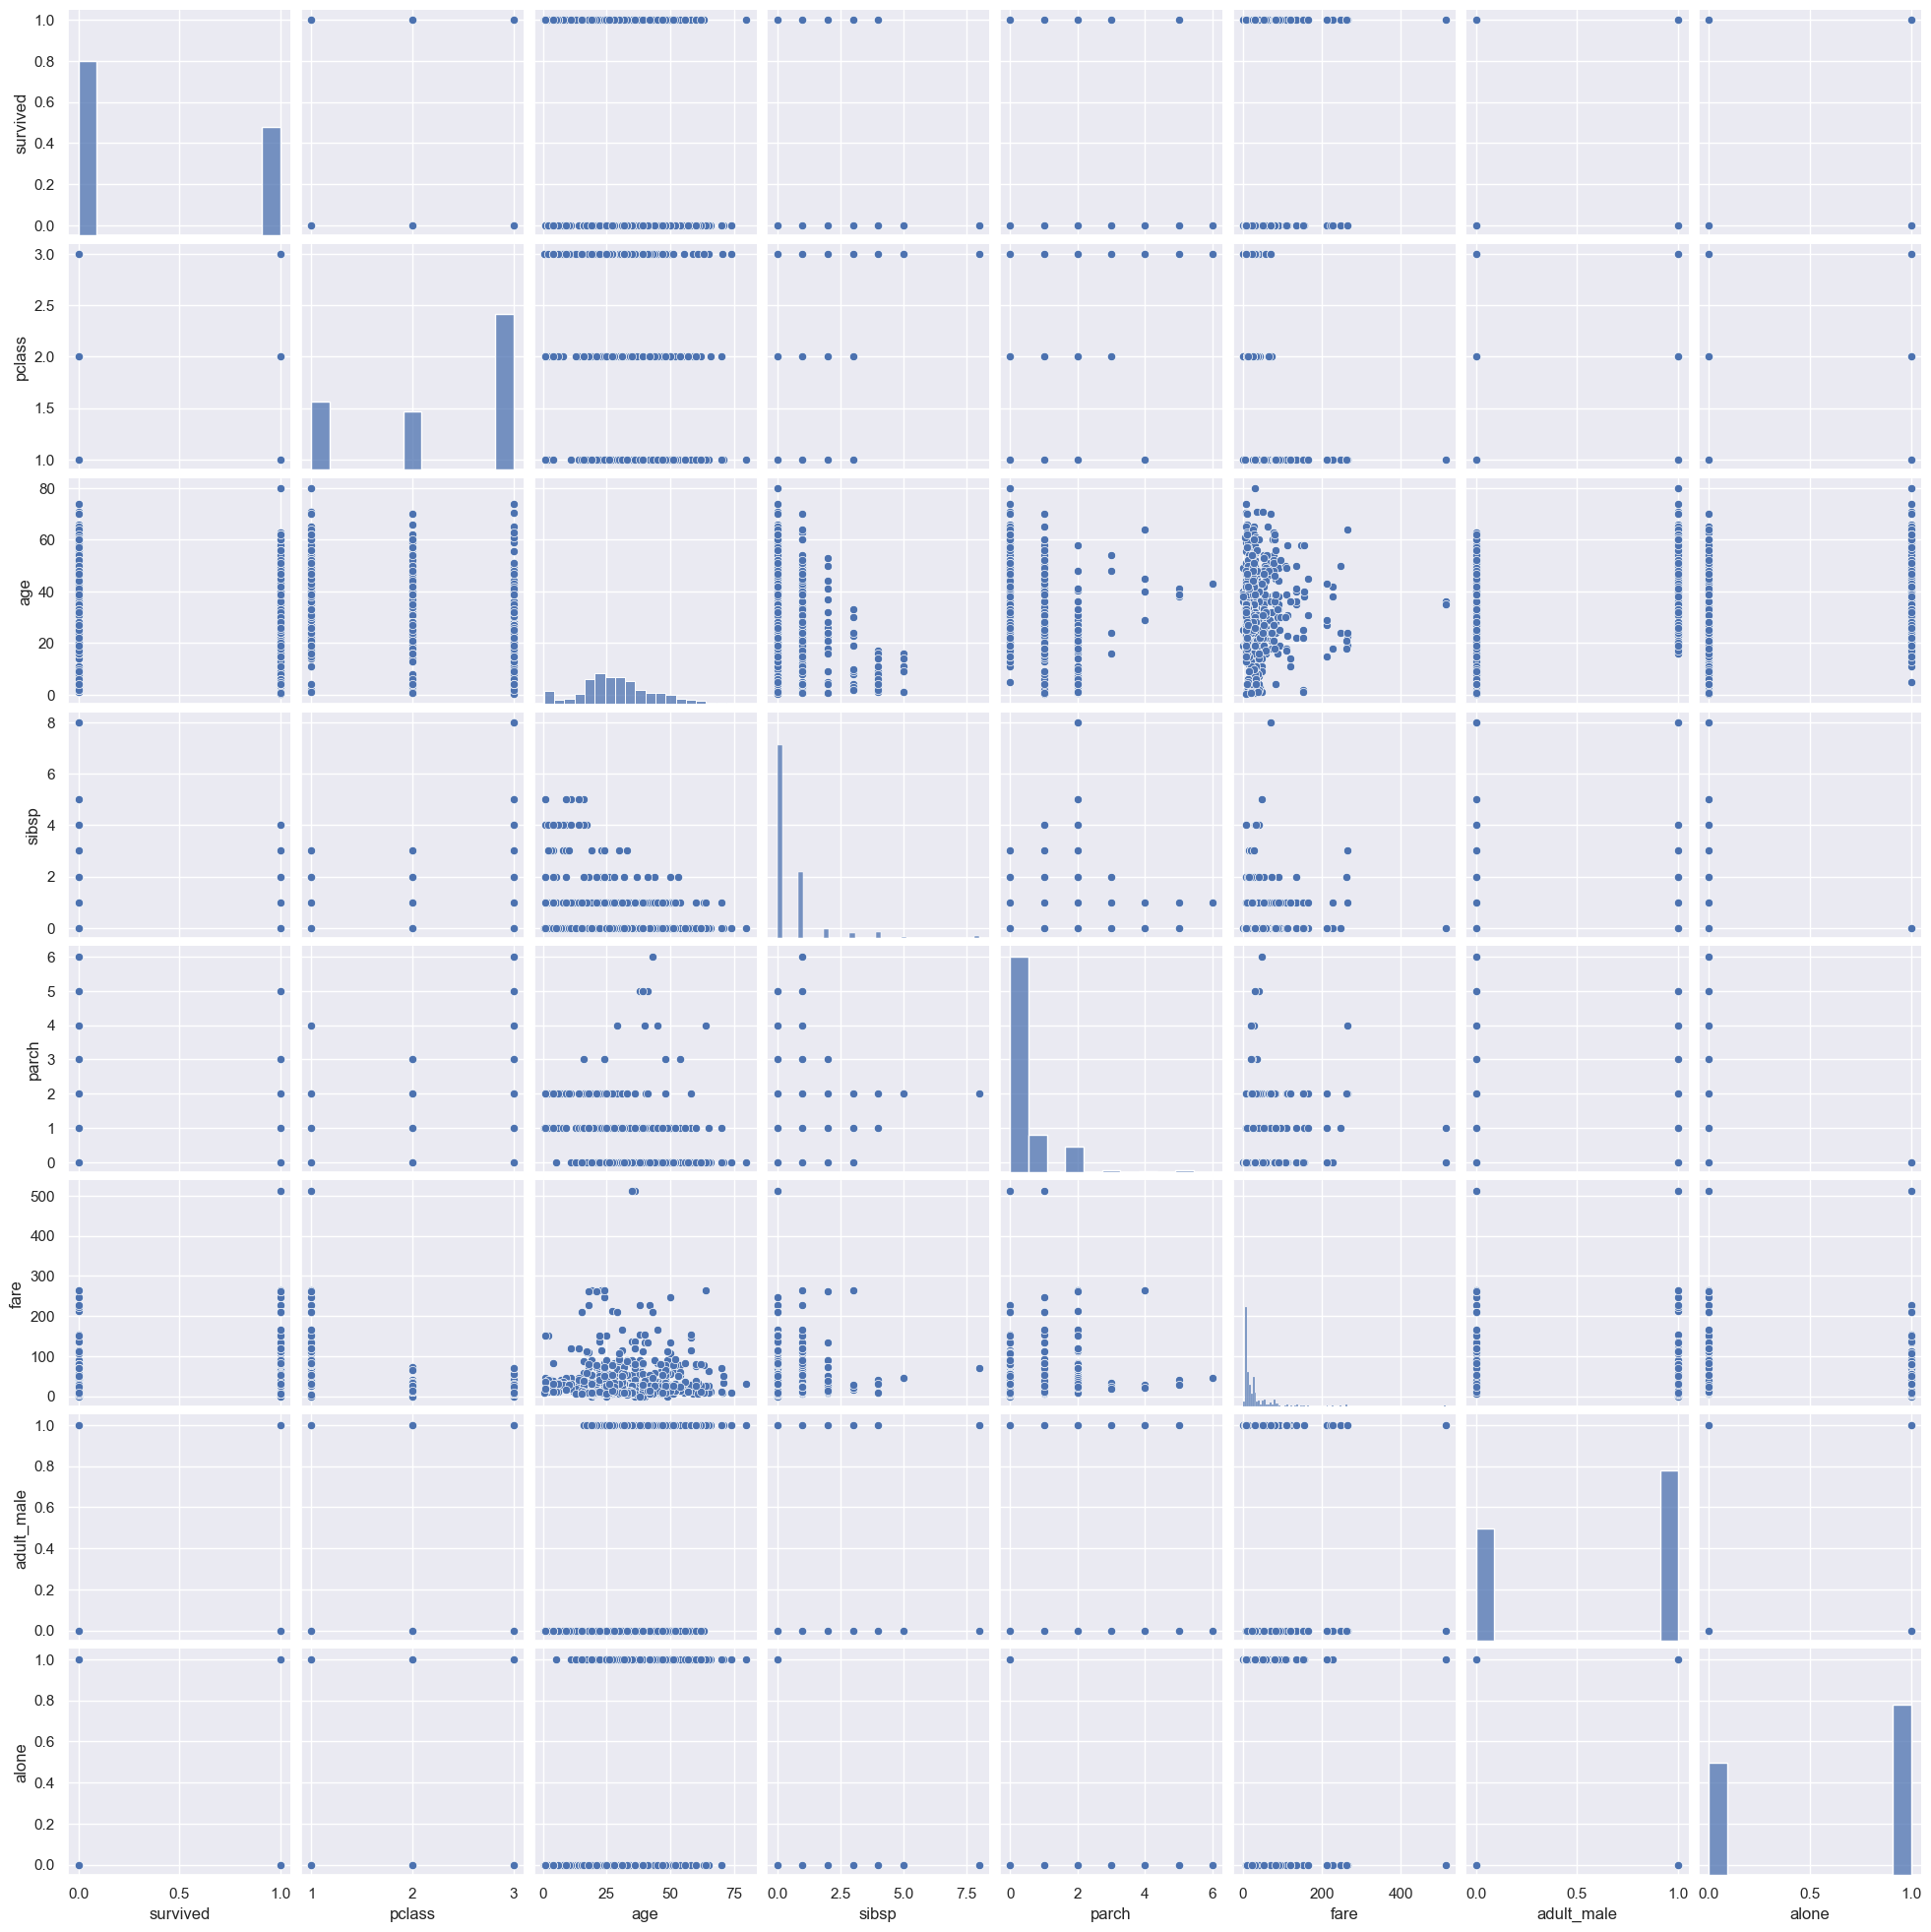

In [24]:
sns.pairplot(titanic)

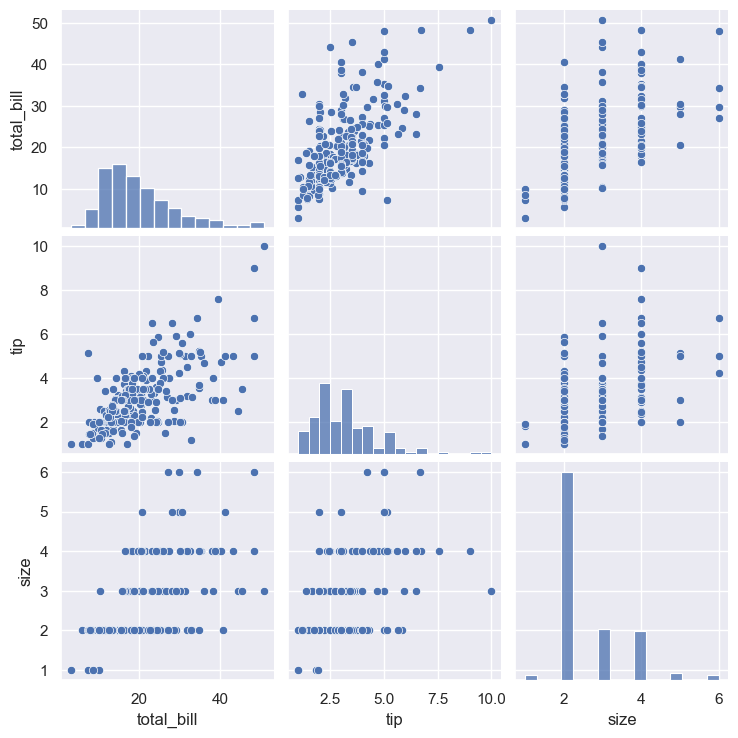

In [25]:
sns.pairplot(tips)

## Kernel Density Estimator (KDE) plot with kdeplot() and distplo()

We can visualize the probability density of a variable. Different to histogram which shows the counts, KDE plot smooths the visualization with a Guassian kernel.

<AxesSubplot: xlabel='tip', ylabel='Density'>

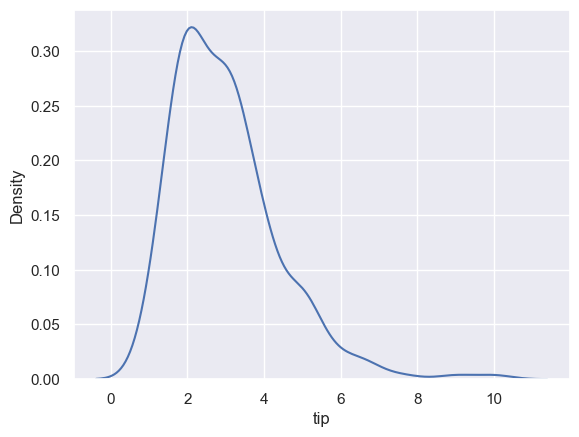

In [26]:
sns.kdeplot(data=tips, x='tip')

<AxesSubplot: xlabel='tip', ylabel='Density'>

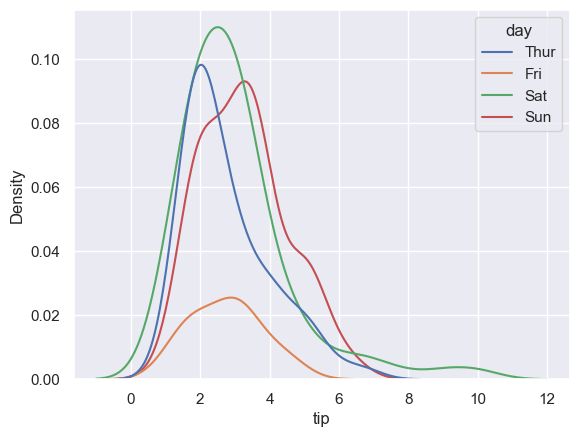

In [27]:
sns.kdeplot(data=tips, x='tip', hue='day')

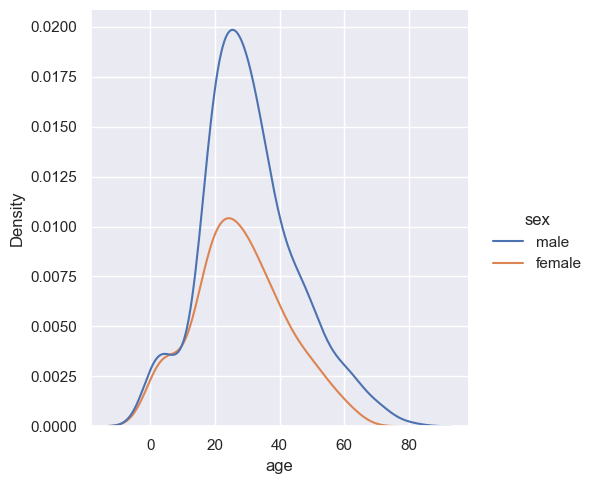

In [28]:
sns.displot(titanic, x='age', kind='kde', hue='sex')

<AxesSubplot: xlabel='tip', ylabel='Density'>

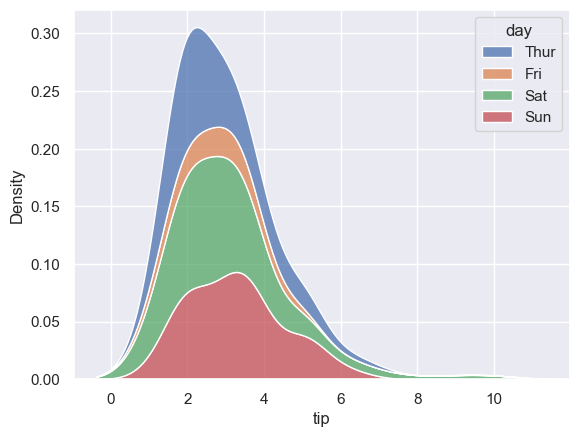

In [29]:
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack')

In [30]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


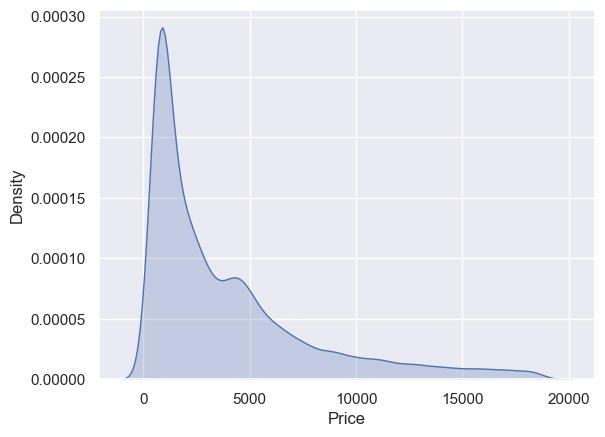

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load a dataset
diamonds = sns.load_dataset("diamonds")

# Plot a KDE plot
sns.kdeplot(diamonds['price'], fill=True)

# Add labels and show the plot
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()


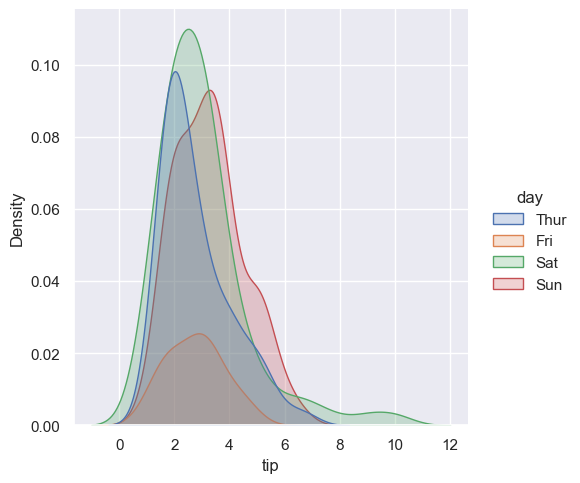

In [33]:
sns.displot(data=tips, x='tip', hue='day', kind='kde', fill=True)

## Categorical Plots